<a href="https://colab.research.google.com/github/s3rgi0xd/inteligencia-artificial-STR/blob/main/Soybean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

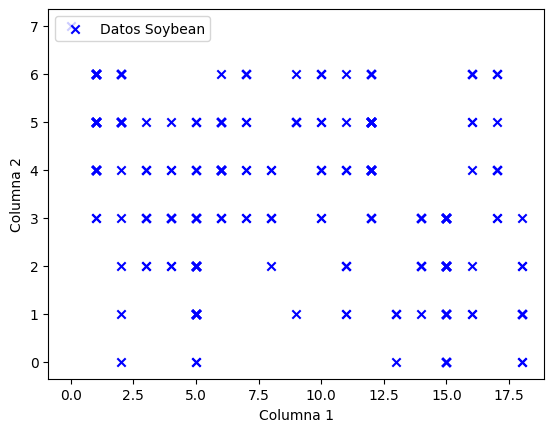

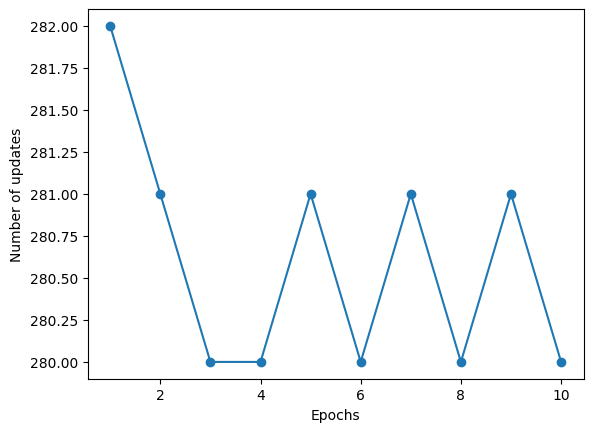

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            error = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                error += int(update != 0.0)
            self.cost_.append(error)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/soybean/soybean-large.data", header=None)

df.tail()

le = LabelEncoder()

df_encoded = df.apply(le.fit_transform)

y = df_encoded.iloc[:, -1].values

X = df_encoded.iloc[:, [0, 1]].values

plt.scatter(X[:, 0], X[:, 1], color='blue', marker='x', label='Datos Soybean')
plt.xlabel('Columna 1')
plt.ylabel('Columna 2')
plt.legend(loc='upper left')
plt.show()

ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

plt.plot(range(1, len(ppn.cost_) + 1), ppn.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()
